In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df= pd.read_csv("Indian_Kids_Screen_Time.csv")

In [30]:
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [31]:
#missing values
print(df.isnull().sum())


Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


In [32]:
#unique values in Health Impacts
unique_values = df['Health_Impacts'].unique()
print(unique_values)



['Poor Sleep, Eye Strain' 'Poor Sleep' nan 'Poor Sleep, Anxiety'
 'Poor Sleep, Obesity Risk' 'Eye Strain' 'Obesity Risk' 'Anxiety'
 'Poor Sleep, Anxiety, Obesity Risk' 'Eye Strain, Obesity Risk'
 'Eye Strain, Anxiety, Obesity Risk' 'Anxiety, Obesity Risk'
 'Poor Sleep, Eye Strain, Obesity Risk' 'Poor Sleep, Eye Strain, Anxiety'
 'Poor Sleep, Eye Strain, Anxiety, Obesity Risk' 'Eye Strain, Anxiety']


In [33]:
# Step 1: Mapping from screen time : most common health impact
impact_mapping = df.groupby('Avg_Daily_Screen_Time_hr')['Health_Impacts'].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
)

# Step 2: Find most common overall health impact (as fallback)
most_common_impact = df['Health_Impacts'].mode().iloc[0]

# Step 3: Function to fill missing values
def fill_health_impact(row):
    if pd.isnull(row['Health_Impacts']):
        mapped_value = impact_mapping.get(row['Avg_Daily_Screen_Time_hr'], np.nan)
        if pd.isnull(mapped_value):
            return most_common_impact  # fallback
        else:
            return mapped_value
    else:
        return row['Health_Impacts']

# Step 4: Apply to DataFrame
df['Health_Impacts'] = df.apply(fill_health_impact, axis=1)



In [34]:
print(df.isnull().sum())


Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64


C:\Users\Prabakaran\AppData\Local\Temp\ipykernel_25300\1387060729.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=impact_counts_df, x='Health_Impact', y='Count', palette='viridis')


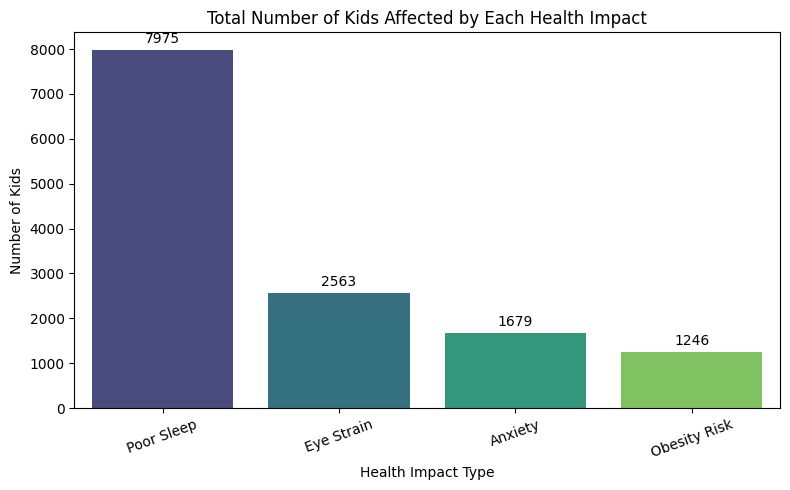

In [41]:
# 1. Split the 'Health_Impacts' column by comma and explode
df_exploded = df.copy()
df_exploded['Health_Impacts'] = df_exploded['Health_Impacts'].fillna("")  # Handle NaN
df_exploded = df_exploded.assign(Health_Impacts=df_exploded['Health_Impacts'].str.split(',')).explode('Health_Impacts')

# 2. Remove extra spaces from impact names
df_exploded['Health_Impacts'] = df_exploded['Health_Impacts'].str.strip()

# 3. Count occurrences
impact_counts = df_exploded['Health_Impacts'][df_exploded['Health_Impacts'] != ""].value_counts()

impact_counts_df = impact_counts.reset_index()
impact_counts_df.columns = ['Health_Impact', 'Count']

# 4. Plot
plt.figure(figsize=(8,5))
ax = sns.barplot(data=impact_counts_df, x='Health_Impact', y='Count', palette='viridis')

# Add labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10)

plt.title("Total Number of Kids Affected by Each Health Impact")
plt.xlabel("Health Impact Type")
plt.ylabel("Number of Kids")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


C:\Users\Prabakaran\AppData\Local\Temp\ipykernel_25300\2852934322.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=combo_counts, y='Health_Impact_Set', x='Count', palette="viridis")


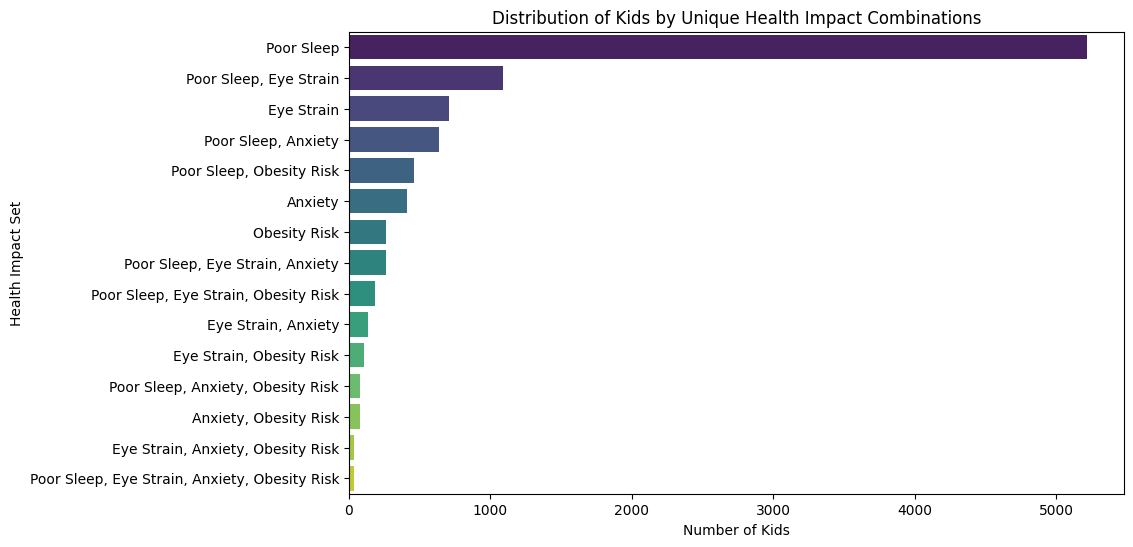

In [42]:
# Count each unique combination of Health_Impacts
combo_counts = df['Health_Impacts'].value_counts().reset_index()
combo_counts.columns = ['Health_Impact_Set', 'Count']




plt.figure(figsize=(10,6))
sns.barplot(data=combo_counts, y='Health_Impact_Set', x='Count', palette="viridis")
plt.xlabel("Number of Kids")
plt.ylabel("Health Impact Set")
plt.title("Distribution of Kids by Unique Health Impact Combinations")
plt.show()





In [43]:
#Category Standardization
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", list(categorical_cols))


Categorical Columns: ['Gender', 'Primary_Device', 'Health_Impacts', 'Urban_or_Rural', 'Age_Group', 'Device_Category', 'Screen_Time_Level']


In [44]:
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().str.title()
# Standardize Gender
df['Gender'] = df['Gender'].replace({
    'M': 'Male', 
    'F': 'Female',
    'Boy': 'Male',
    'Girl': 'Female'
})

# Standardize Location
df['Urban_or_Rural'] = df['Urban_or_Rural'].replace({
    'City': 'Urban',
    'Town': 'Urban',
    'Village': 'Rural',
    'Countryside': 'Rural'
})

# Standardize Device names
df['Primary_Device'] = df['Primary_Device'].replace({
    'Mobile': 'Smartphone',
    'Phone': 'Smartphone',
    'Tab': 'Tablet',
    'Computer': 'Laptop'
})

# Standardize Exceeded_Recommended_Limit
df['Exceeded_Recommended_Limit'] = df['Exceeded_Recommended_Limit'].replace({
    'True': True,
    'False': False,
    'Yes': True,
    'No': False
})


In [45]:
# Specify the columns you want to check
columns_to_check = ['Age','Gender', 'Primary_Device', 'Health_Impacts', 'Urban_or_Rural']

# Loop through and print unique values
for col in columns_to_check:
    print(f"\nColumn: {col}")
    print(df[col].unique())



Column: Age
[14 11 18 15 12 17 10 13  9  8 16]

Column: Gender
['Male' 'Female']

Column: Primary_Device
['Smartphone' 'Laptop' 'Tv' 'Tablet']

Column: Health_Impacts
['Poor Sleep, Eye Strain' 'Poor Sleep' 'Poor Sleep, Anxiety'
 'Poor Sleep, Obesity Risk' 'Eye Strain' 'Obesity Risk' 'Anxiety'
 'Poor Sleep, Anxiety, Obesity Risk' 'Eye Strain, Obesity Risk'
 'Eye Strain, Anxiety, Obesity Risk' 'Anxiety, Obesity Risk'
 'Poor Sleep, Eye Strain, Obesity Risk' 'Poor Sleep, Eye Strain, Anxiety'
 'Poor Sleep, Eye Strain, Anxiety, Obesity Risk' 'Eye Strain, Anxiety']

Column: Urban_or_Rural
['Urban' 'Rural']


In [53]:
# 1. Age Group
def age_group(age):
    if age <= 5:
        return "Toddler"
    elif age <= 10:
        return "Child"
    elif age <= 14:
        return "Early Teen"
    else:
        return "Teen"

df['Age_Group'] = df['Age'].apply(age_group)

# 2. Device Category
def device_category(device):
    if device in ['Smartphone', 'Tablet']:
        return "Mobile"
    elif device == 'Laptop':
        return "Laptop"
    else:
        return "TV"

df['Device_Category'] = df['Primary_Device'].apply(device_category)

# 3. Screen Time Level
def screen_time_level(hours):
    if hours < 2:
        return "Low"
    elif hours < 4:
        return "Medium"
    elif hours < 6:
        return "High"
    else:
        return "Very High"

df['Screen_Time_Level'] = df['Avg_Daily_Screen_Time_hr'].apply(screen_time_level)

# 4. Health Impact Count
df['Health_Impact_Count'] = df['Health_Impacts'].fillna("").apply(lambda x: len(x.split(',')) if x else 0)

# 5. Educational vs Recreational Dominance
def edu_vs_rec(ratio):
    if ratio > 0.5:
        return "Education Dominant"
    elif ratio >= 0.5:
        return "Balanced"
    else:
        return "Recreational Dominant"
df['Edu_vs_Rec'] = df['Educational_to_Recreational_Ratio'].apply(edu_vs_rec)

df.head(10)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Group,Device_Category,Screen_Time_Level,Health_Impact_Count,Edu_vs_Rec
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Early Teen,Mobile,Medium,2,Recreational Dominant
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Early Teen,Laptop,High,1,Recreational Dominant
2,18,Female,3.73,Tv,True,0.32,Poor Sleep,Urban,Teen,TV,Medium,1,Recreational Dominant
3,15,Female,1.21,Laptop,False,0.39,Poor Sleep,Urban,Teen,Laptop,Low,1,Recreational Dominant
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Early Teen,Mobile,High,2,Recreational Dominant
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban,Early Teen,Mobile,High,1,Recreational Dominant
6,17,Male,2.97,Tv,False,0.48,Poor Sleep,Rural,Teen,TV,Medium,1,Recreational Dominant
7,10,Male,2.74,Tv,True,0.54,Poor Sleep,Urban,Child,TV,Medium,1,Education Dominant
8,14,Male,4.61,Laptop,True,0.36,"Poor Sleep, Anxiety",Rural,Early Teen,Laptop,High,2,Recreational Dominant
9,18,Male,3.24,Tablet,True,0.48,"Poor Sleep, Obesity Risk",Urban,Teen,Mobile,Medium,2,Recreational Dominant


In [51]:
import os
os.getcwd()
os.makedirs('C:\\Users\\Prabakaran\\DEMO',exist_ok=True)
os.makedirs('C:/MyDatasets',exist_ok=True)
df.to_csv('C:/MyDatasets/Preprocessed_Indian_Kids_Screen_Time.csv', index=False)